In [9]:
import pandas as pd

data = pd.read_csv('Data_1.csv')

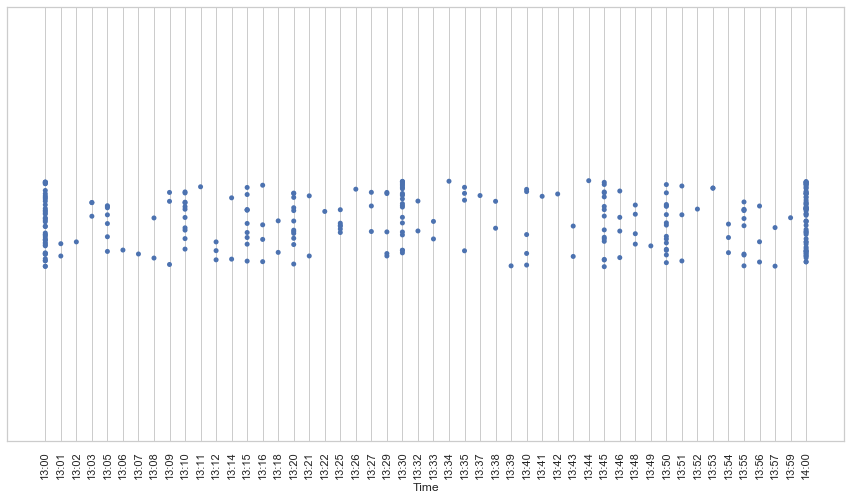

In [10]:
import numpy as np
data['Date'] = pd.to_datetime(data['Date'])
data = data[(data['Date'] >= pd.to_datetime('01/21/2017')) & (data['Date'] <= pd.to_datetime('07/21/2017'))]
data.index = data['Category']
data_ASSAULT = data.loc['ASSAULT',:]
data_ASSAULT = data_ASSAULT.sort_values(by="Time")
data_ASSAULT.index = pd.to_datetime(data_ASSAULT['Time'])
data_ASSAULT = data_ASSAULT.between_time('13:00:00', '14:00:00', include_start=True, include_end=True)
#print(data_ASSAULT)

import seaborn
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
# use to set style of background of plot
seaborn.set(style = 'whitegrid')
  
# loading data-set
seaborn.stripplot(x=data_ASSAULT['Time'], marker='o')
plt.xticks(rotation=90)
plt.show()

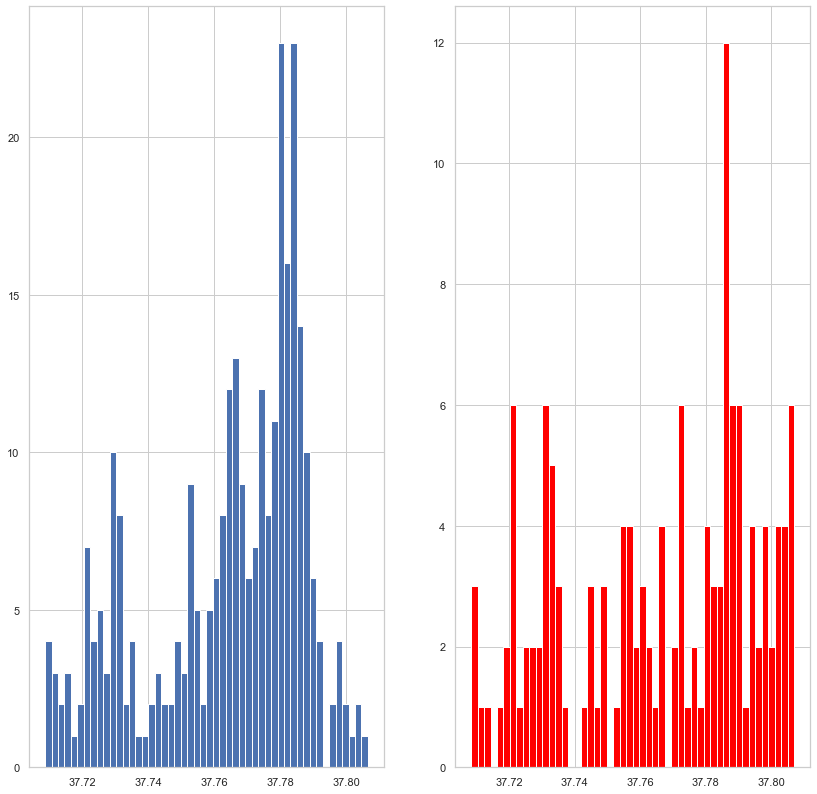

In [11]:
data_BURGLARY = data.loc['BURGLARY',:]
data_BURGLARY = data_BURGLARY.sort_values(by="Time")
data_BURGLARY.index = pd.to_datetime(data_BURGLARY['Time'])
data_BURGLARY = data_BURGLARY.between_time('13:00:00', '14:00:00', include_start=True, include_end=True)
#print(data_BURGLARY)

f, axs = plt.subplots(1, 2, sharex=False, sharey=False,figsize=(14,14))
axs[0].hist(data_ASSAULT['Y'], bins=50)
axs[1].hist(data_BURGLARY['Y'], bins=50, color='red')
plt.show()

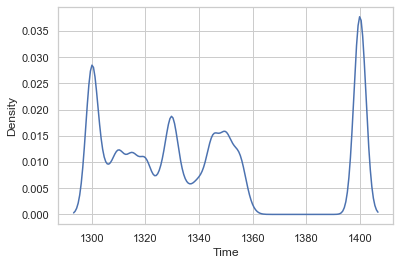

In [27]:
data_ASSAULT_x = data_ASSAULT['Time'].str.replace(':', '').astype(float)
#print(data_ASSAULT_x)
seaborn.kdeplot(data=data_ASSAULT_x, bw_adjust=0.2)

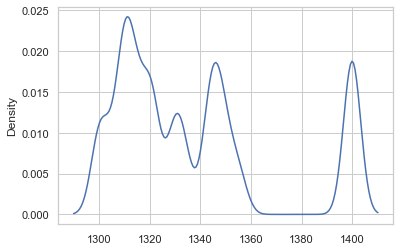

In [28]:
import random
sample_num = 25
data_part = random.sample(list(data_ASSAULT_x), sample_num)

seaborn.kdeplot(data=data_part, bw_adjust=0.2)
#Why will this mislead?

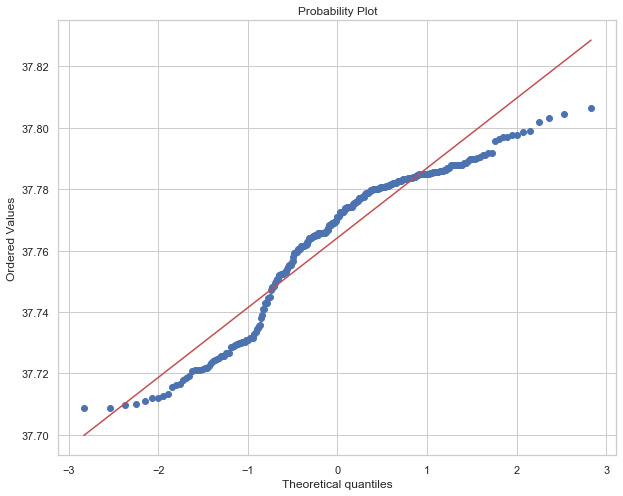

In [32]:
from scipy import stats
plt.figure(figsize=((10,8)))
stats.probplot(data_ASSAULT['Y'], plot=plt)
plt.show()

In [40]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'DISORDERLY CONDUCT','STOLEN PROPERTY','VEHICLE THEFT'])

condition = data['Category'].isin(focuscrimes)
focuscrimesdf = data.loc[condition, :]
focuscrimesdf.index = pd.to_datetime(focuscrimesdf['Date'])
focuscrimesdf_grouped = focuscrimesdf.groupby("Category")
focuscrimesdf_grouped = focuscrimesdf_grouped.sort_values(by="Date")
print(focuscrimesdf_grouped)


AttributeError: Cannot access callable attribute 'sort_values' of 'DataFrameGroupBy' objects, try using the 'apply' method